Описание проекта
Мне передали данные о некоторых пользователях, сервиса аренды самокатов GoFast, из нескольких городов, а также об их поездках. Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
без подписки:
абонентская плата отсутствует; стоимость одной минуты поездки — 8 рублей;стоимость старта (начала поездки) — 50 рублей;
с подпиской Ultra:
абонентская плата — 199 рублей в месяц;стоимость одной минуты поездки — 6 рублей;стоимость старта — бесплатно.

В основных данных есть информация о пользователях, их поездках и подписках:

Пользователи — users_go.csv:

user_id - уникальный идентификатор пользователя
name - имя пользователя
age - возраст
city - город
subscription_type - тип подписки (free, ultra)

Поездки — rides_go.csv:

user_id	- уникальный идентификатор пользователя
distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
date - дата совершения поездки

Подписки — subscriptions_go.csv

subscription_type - тип подписки
minute_price-  стоимость одной минуты поездки по данной подписке
start_ride_price - стоимость начала поездки
subscription_fee - стоимость ежемесячного платежа

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats as st

#### Шаг 1. Загрузка данных

1.1 Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы. Пути к файлам:
/datasets/users_go.csv
/datasets/rides_go.csv
/datasets/subscriptions_go.csv
1.2 Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.

In [2]:
data_users = pd.read_csv('/datasets/users_go.csv')
data_rides = pd.read_csv('/datasets/rides_go.csv')
data_subscription = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [4]:
data_users.describe()

,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


In [5]:
data_users.head(5)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [6]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
data_rides.describe()

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


In [8]:
data_rides.head(5)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [9]:
data_subscription.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [10]:
data_subscription.describe()

,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


In [11]:
data_subscription.head(5)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [12]:
count_sub = data_users['subscription_type'].value_counts()
count_sub

free     846
ultra    719
Name: subscription_type, dtype: int64

Вывод

После первичного анализа данных можем сказать следующее:

Основные пользователи - люди от 20 до 30 лет
Средняя дистанция в пути составляет 3070м
Среднее время в пути 17 минут
Преобладают пользователи с бесплатным тарифом (54%)

#### Шаг 2. Предобработка данных

2.1 Приведите столбец date к типу даты pandas.
2.2 Создайте новый столбец с номером месяца на основе столбца date.
2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

Приведу столбец date к типу даты pandas.

In [13]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')

Создаю новый столбец с номером месяца на основе столбца date.

In [14]:
data_rides['month'] = pd.DatetimeIndex(data_rides['date']).month

Проверяю корректность выполненной задачи

In [15]:
data_rides.head(5)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Обрабатываю пропуски и дубликаты

In [16]:
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [17]:
data_users.isna().mean()

user_id              0.0
name                 0.0
age                  0.0
city                 0.0
subscription_type    0.0
dtype: float64

In [18]:
data_users.duplicated().sum()

31

Нашел 31 будликат. Удалю их из данных

In [19]:
data_users = data_users.drop_duplicates()
data_users = data_users.reset_index(drop=True)
data_users.duplicated().sum()

0

Выполним те же процедуры с оставшимися датафреймами

In [20]:
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [21]:
data_rides.isna().mean()

user_id     0.0
distance    0.0
duration    0.0
date        0.0
month       0.0
dtype: float64

In [22]:
data_rides.duplicated().sum()

0

Пропуски и дубликаты не выявлены

In [23]:
data_subscription.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [24]:
data_subscription.isna().mean()

subscription_type    0.0
minute_price         0.0
start_ride_price     0.0
subscription_fee     0.0
dtype: float64

In [25]:
data_subscription.duplicated().sum()

0

На Этапе2 Предобработка данных я проверил 3 актуальных датафрейма на пропуски и дубликаты.
В датафрейме data_rides привел столбец date в необходимый вид и создал дополнительный столбец с номером месяца

#### Шаг 3. Исследовательский анализ данных

Опишите и визуализируйте общую информацию о пользователях и поездках:
3.1 частота встречаемости городов;
3.2 соотношение пользователей с подпиской и без подписки;
3.3 возраст пользователей;
3.4 расстояние, которое пользователь преодолел за одну поездку;
3.5 продолжительность поездок.

3.1. Частота встречаемости городов

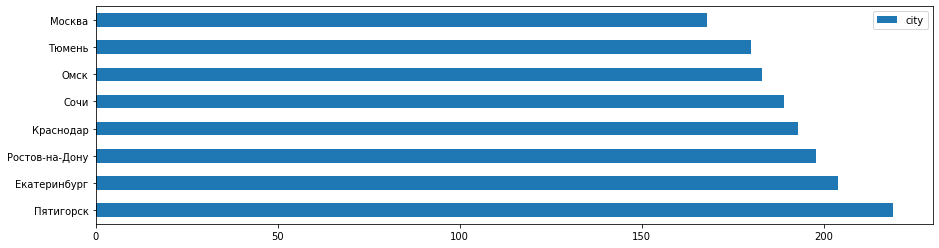

In [26]:
data_users['city'].value_counts().to_frame().plot(kind = 'barh', figsize = (15,4));

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

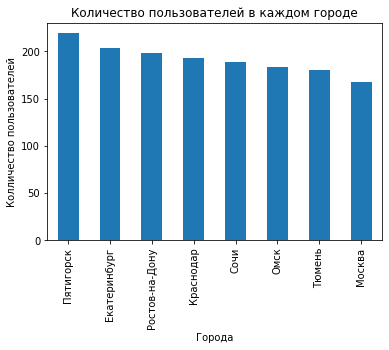

In [27]:
fig = plt.figure()
ax = fig.add_subplot()
data_users['city'].value_counts().plot(kind='bar');
plt.title('Количество пользователей в каждом городе');
ax.set_xlabel('Города')
ax.set_ylabel('Колличество пользователей')
data_users['city'].value_counts()


Самые частовстречаемые города - Пятигорск и Екатегинбург(более 200 раз). Наименьшая частота встречи у Москвы (около 170 раз)

3.2.Cоотношение пользователей с подпиской и без подписки

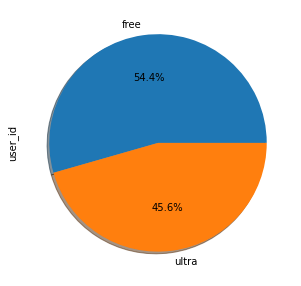

In [28]:
cont = data_users.groupby((['subscription_type'])).count()
cont['user_id'].plot(kind='pie', figsize=(5,5),
                  autopct='%1.1f%%',
                  shadow=True);

Соотношениее пользователей:
free 54%
ultra 46%
Распределение примерно одинаковое, однако пользователей без подписки (free) чуть больше

3.3. Возраст пользователей

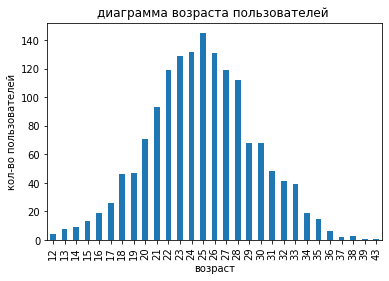

In [29]:
age = data_users.groupby('age').count()
age['user_id'].plot(kind = 'bar');
plt.title('диаграмма возраста пользователей ')
plt.xlabel('возраст')
plt.ylabel('кол-во пользователей');

In [30]:
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Большая часть пользователей находится в возрастном промежутке от 22 до 28. Среднее значение составляет 25 лет. Распределение имеет тип Нормального распределения

3.4 расстояние, которое пользователь преодолел за одну поездку;

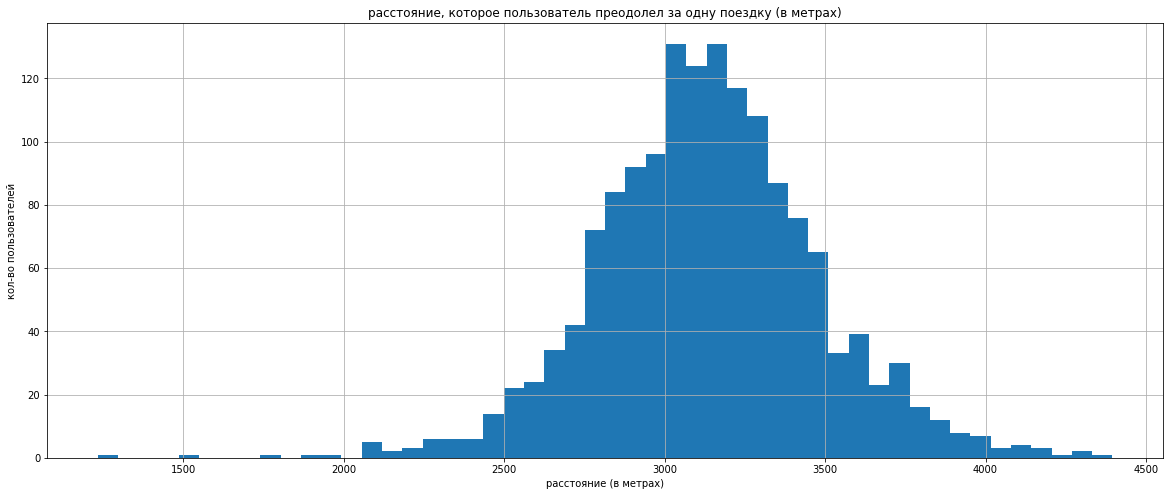

In [31]:
dis = data_rides.pivot_table(index = 'user_id', values = 'distance', aggfunc= 'median')
dis.hist(bins = 50, figsize = (20, 8))
plt.title('расстояние, которое пользователь преодолел за одну поездку (в метрах)')
plt.xlabel('расстояние (в метрах)')
plt.ylabel('кол-во пользователей');

In [32]:
dis['distance'].describe()

count    1534.000000
mean     3134.108236
std       346.362860
min      1234.763317
25%      2916.315439
50%      3131.071202
75%      3337.730942
max      4395.430303
Name: distance, dtype: float64

Сгруппировал поездки каждого пользователя и привел их к медианному значению, что бы избежать выбросы. 
Среднее расстояние, которое пользователи преодолели за одну поездку - в промежутке от 2,9км и 3,3км

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

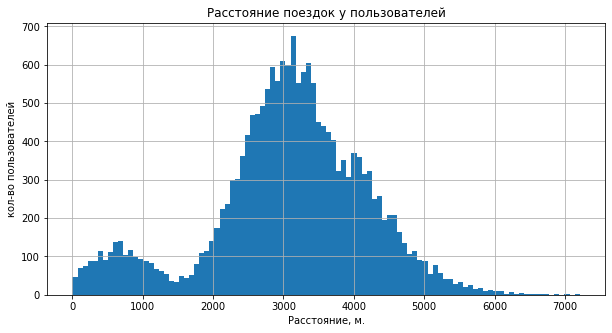

In [33]:
data_rides['distance'].hist(bins=100, figsize = (10,5))
plt.title('Расстояние поездок у пользователей');
plt.xlabel('Расстояние, м.');
plt.ylabel('кол-во пользователей');
data_rides['distance'].describe()

Сгруппировал поездки каждого пользователя и привел их к медианному значению, что бы избежать выбросы. 
Среднее расстояние, которое пользователи преодолели за одну поездку - в промежутке от 2,9км и 3,3км

3.5 продолжительность поездок

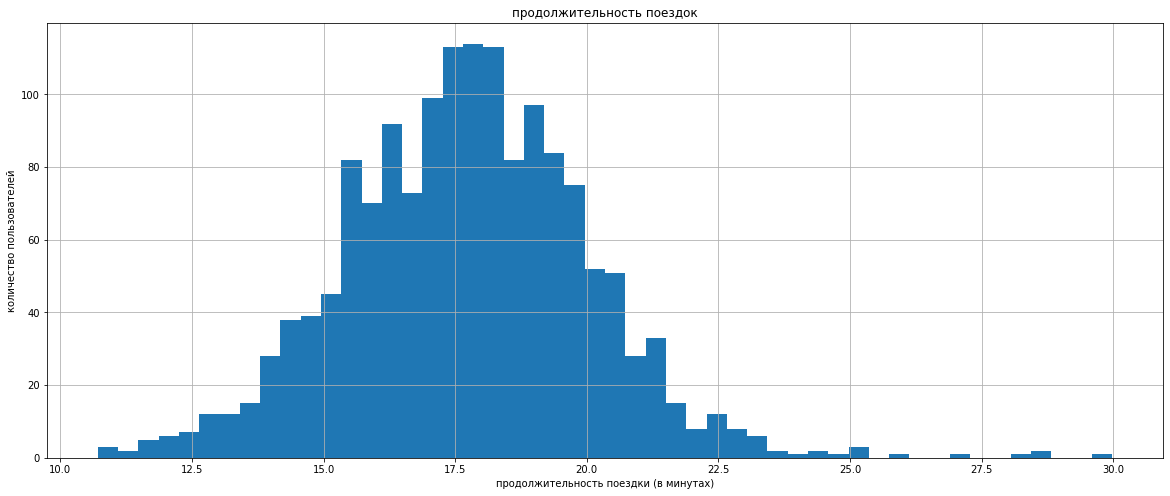

In [34]:
time = data_rides.pivot_table(index = 'user_id', values = 'duration', aggfunc= 'median')
time.hist(bins = 50, figsize = (20, 8))
plt.title('продолжительность поездок')
plt.xlabel('продолжительность поездки (в минутах)')
plt.ylabel('количество пользователей');

In [35]:
time['duration'].describe()

count    1534.000000
mean       17.727225
std         2.322542
min        10.711378
25%        16.189955
50%        17.743728
75%        19.208337
max        29.983174
Name: duration, dtype: float64

Среднее время поездок пользователей лежит в промежутке между 16 и 19 минутами

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

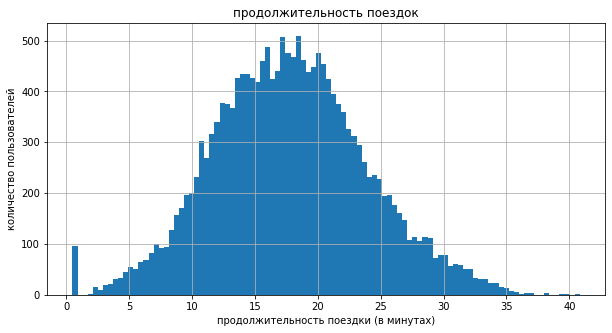

In [36]:
data_rides['duration'].hist(bins=100, figsize = (10,5))
plt.title('продолжительность поездок')
plt.xlabel('продолжительность поездки (в минутах)')
plt.ylabel('количество пользователей');
data_rides['distance'].describe()

Среднее время поездок пользователей лежит в промежутке между 16 и 20 минутами

Вывод


Лидером по количеству пользователей является Пятигорск - 219 пользователей. Меньше всего пользователей в Москве - 168. 

Пользователей, использующих бесплатную подписку больше - 835 человек, что является ~54% от общего числа пользователей. На платной подписке сидит 699 пользователей, что соответственно является ~46%.

Самыми младшими являются пользователи 12, 13 лет.
Самыми старшими - 43, 39.
В целом, пользователи приложения укладываются в промежуток от 20 до 30 лет. 
Распределение по возрастам можно отнести к нормальному

Самая короткая дистанция - 0.86 км
Самая длинная - 7.2 км
В основном пользователи проезжают от 2.5 км до 4 км.

Самые короткие поездки - по пол минуты.
Самая длинная поездка заняла 40 минут.
В основном же длительность поездки состовляет 13 - 22 минут.

#### Шаг 4. Объединение данных

4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().
4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
c данными о пользователях без подписки;
с данными о пользователях с подпиской.
4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().

In [37]:
united_data = data_users.merge(data_rides, on='user_id', how='left')
united_data = united_data.merge(data_subscription, on='subscription_type', how='left')
united_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [38]:
united_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
c данными о пользователях без подписки;
с данными о пользователях с подпиской.

In [39]:
data_free = united_data.loc[united_data['subscription_type'] == 'free']

In [40]:
data_free.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int64         
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


In [41]:
data_ultra = united_data.loc[united_data['subscription_type'] == 'ultra']

In [42]:
data_ultra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int64         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 660.2+ KB


4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

Визуализируем информацию о расстоянии

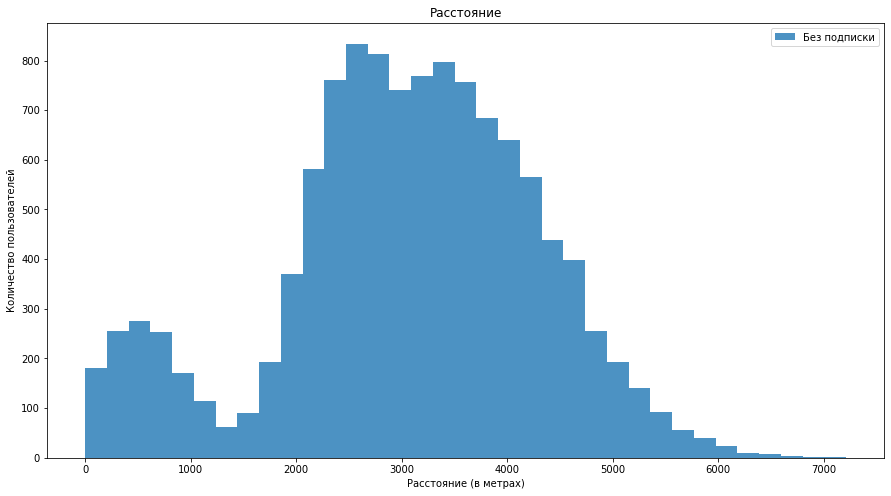

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

In [43]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(data_free['distance'], bins=35, label='Без подписки', alpha=0.8)
ax.set_title('Расстояние')
ax.set_ylabel('Количество пользователей')
ax.set_xlabel('Расстояние (в метрах)')
plt.legend()
plt.show()
display(data_free['distance'].describe())

Для пользователей без подписки среднее расстояние варьируется от 2.5 до 4х км

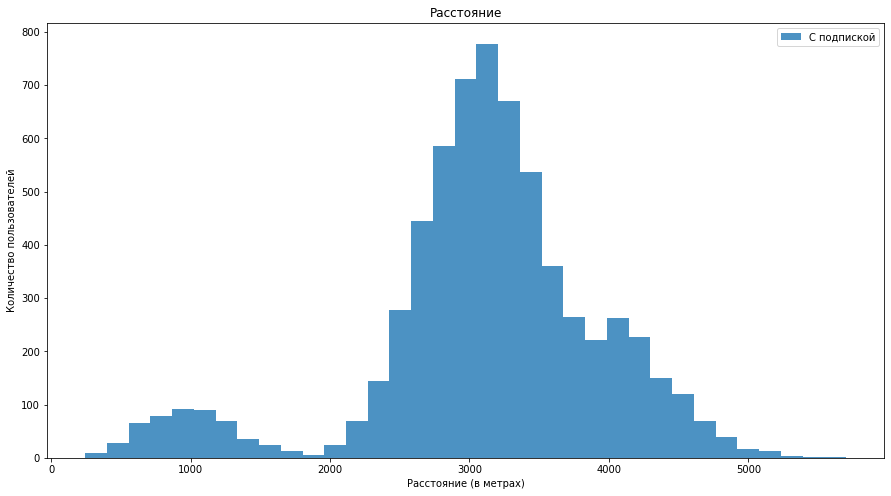

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

In [44]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(data_ultra['distance'], bins=35, label='С подпиской', alpha=0.8)
ax.set_title('Расстояние')
ax.set_ylabel('Количество пользователей')
ax.set_xlabel('Расстояние (в метрах)')
plt.legend()
plt.show()
display(data_ultra['distance'].describe())

Для пользователей с подпиской среднее расстояние варьируется от 2.5 до 3.5 км

Визуализируем информацию о времени

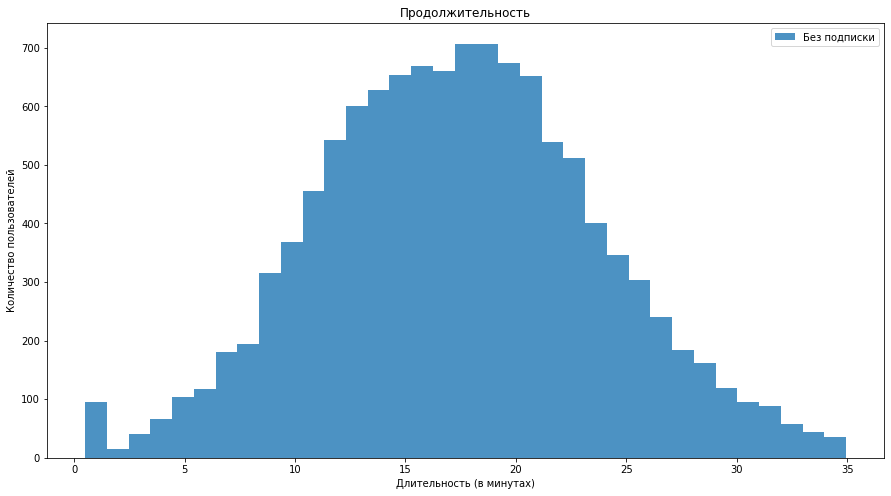

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

In [45]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(data_free['duration'], bins=35, label='Без подписки', alpha=0.8)
ax.set_title('Продолжительность')
ax.set_ylabel('Количество пользователей')
ax.set_xlabel('Длительность (в минутах)')
plt.legend()
plt.show()
data_free['duration'].describe()

Для пользователей без подписки среднее время варьируется от 15 до 20 мин.

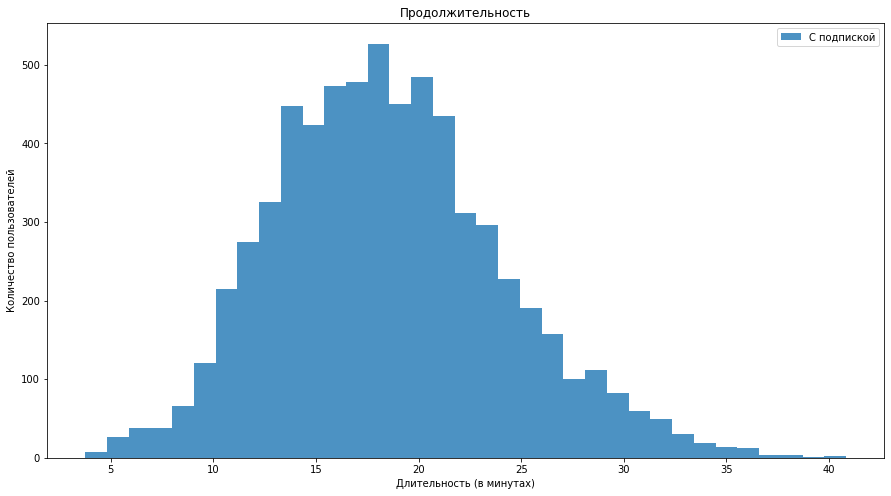

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

In [46]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(data_ultra['duration'], bins=35, label='С подпиской', alpha=0.8)
ax.set_title('Продолжительность')
ax.set_ylabel('Количество пользователей')
ax.set_xlabel('Длительность (в минутах)')
plt.legend()
plt.show()
data_ultra['duration'].describe()

Для пользователей с подпиской среднее время варьируется от 13 до 20 мин.

Пользователи без подписки в среднем проезжают расстояние от 2.5 до 4 км и арендуют самокаты от 15 до 20 минут.
Пользователи с подпиской в среднем проезжают расстояние от 2.5 до 3.5 км и также арендуют самокаты от 13 до 20 минут

Вывод

Объединили данные о пользователях, поездках и тарифах в один датафрейм - united_data

Выделили два датафрейма на основе full_data:

data_free- Информация о пользователях с бесплатным тарифом
data_ultra - Информация о пользователях с платным тарифом
Визуализировали информацию о расстоянии и времени для каждого из тарифов.

Для бесплатного тарифа время поездки составляет от 10 до 30 минут, и проезжают от 2 до 5 км

Платный тариф. В основном время укладывается в промежуток от 15 до 25 минут. Пик расстояния приходится на 3км.

Таким образом, можно сделать вывод, что пользователи с бесплатным тарифом в целом совершают более долгие поездки, а также проезжают большее расстояние, чем пользователи на платном тарифе.

Шаг 5. Подсчёт выручки

5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 
25.3 25.3, 25.5 25.5 и 26.0 26.0 должны быть преобразованы к 26 26.

Продолжительность каждой поездки должна быть округлена с помощью метода «потолок» библиотеки numpy — np.ceil():
import numpy as np
rides_df['duration'] = np.ceil(rides_df['duration']) 
Помесячная выручка считается по формуле: (стоимость старта поездки ×  количество поездок)+ стоимость одной минуты поездки ×  общая продолжительность всех поездок в минутах) + стоимость подписки.

5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [47]:
data_rides['duration'] = np.ceil(data_rides['duration']) 

In [48]:
data_agg =  (united_data.groupby(['user_id','month'])
             .agg(distance_sum=('distance', 'sum'),
                  duration_sum=('duration', 'sum'),
                  duration_count=('duration', 'count')) 
             .reset_index()
             )
data_agg['duration_sum'] =  data_agg['duration_sum'].round().astype('int')
data_agg

,user_id,month,distance_sum,duration_sum,duration_count
0,1,1,7027.511294,41,2
1,1,4,754.159807,6,1
2,1,8,6723.470560,45,2
3,1,10,5809.911100,32,2
4,1,11,7003.499363,53,3
...,...,...,...,...,...
11326,1534,6,3409.468534,25,2
11327,1534,8,7622.453034,47,2
11328,1534,9,4928.173852,23,1
11329,1534,11,13350.015305,76,4


Написал в пункте 71

5.2.В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь.

Для решения этой задачи мы создадим несколько вспомогательных датафреймов. В одном мы соберем всю необходимую информация для проведения расчёта и второй, который мы присоеденим к датафрейму полученному раньше

In [49]:
datalist = united_data[['user_id','subscription_type', 'minute_price', 'start_ride_price','subscription_fee', 'month']]

dataset = datalist.merge(data_agg, on = ['user_id', 'month'], how = 'left')
dataset = dataset.drop_duplicates().reset_index(drop = True)
dataset

,user_id,subscription_type,minute_price,start_ride_price,subscription_fee,month,distance_sum,duration_sum,duration_count
0,1,ultra,6,0,199,1,7027.511294,41,2
1,1,ultra,6,0,199,4,754.159807,6,1
2,1,ultra,6,0,199,8,6723.470560,45,2
3,1,ultra,6,0,199,10,5809.911100,32,2
4,1,ultra,6,0,199,11,7003.499363,53,3
...,...,...,...,...,...,...,...,...,...
11326,1534,free,8,50,0,6,3409.468534,25,2
11327,1534,free,8,50,0,8,7622.453034,47,2
11328,1534,free,8,50,0,9,4928.173852,23,1
11329,1534,free,8,50,0,11,13350.015305,76,4


In [50]:
dataset['prise_sum'] = ((dataset['start_ride_price'] * dataset['duration_count'])
                        + (dataset['minute_price'] * dataset['duration_sum'])
                        + dataset['subscription_fee']
                       )

In [51]:
dataset1 = dataset[['user_id', 'month','subscription_type', 'prise_sum']]

In [52]:
data_agg_sum = data_agg.merge(dataset1, on = ['user_id', 'month'], how = 'left')
data_agg_sum.head()

,user_id,month,distance_sum,duration_sum,duration_count,subscription_type,prise_sum
0,1,1,7027.511294,41,2,ultra,445
1,1,4,754.159807,6,1,ultra,235
2,1,8,6723.470560,45,2,ultra,469
3,1,10,5809.911100,32,2,ultra,391
4,1,11,7003.499363,53,3,ultra,517


Вывод

Создали новый датафрейм с агрегированными данными.

Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Также добавили столбец с помесячной выручкой, которую принес каждый пользователь.

#### Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.
6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает3130 метров? Проверьте гипотезу и сделайте выводы.
6.3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.
6.4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

H_0: Длительность поездки у пользователей с подпиской и без неё, равна 
H_a: Длительность поездки у пользователей с подпиской больше чем у пользователей без подписки
alpha = 0.05

In [53]:
results = st.ttest_ind(data_free['duration'], data_ultra['duration'], alternative='less')
p_value = results.pvalue
duration_diff = data_ultra['duration'].mean() - data_free['duration'].mean()
if results.pvalue < 0.05:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print("Значение p-value:", p_value)
print("Средняя длительность:", duration_diff)

Отвергаем нулевую гипотезу
Значение p-value: 1.2804098316645618e-34
Средняя длительность: 1.1510758641418413


Вывод: Проверка гипотезы показала, что длительность поездки у пользователей с подпиской больше чем у пользователей без подписки

6.2.Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метро

H_0: Среднее расстояние пользователей с подпиской равно 3130 метров
H_a: Среднее расстояние пользователей с подпиской не превышает 3130 метров
alpha = 0.05

In [54]:
results = st.ttest_1samp(data_ultra['distance'], 3130, alternative='less')
p_value = results.pvalue
mean_distance = data_ultra['distance'].mean()
if results.pvalue < 0.05:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print("Значение p-value:", p_value)
print("Среднее расстояние:", mean_distance)

Не получилось отвергнуть нулевую гипотезу
Значение p-value: 0.08046311521502146
Среднее расстояние: 3115.4453880370247


Вывод: Проверка гипотезы показала, что cреднее расстояние пользователей с подпиской превышает или равно 3130 метров

H_0: Среднее расстояние пользователей с подпиской равно 3130 метров
H_a: Подписчики в среднем проезжают расстояние больше оптимальног
alpha = 0.05

In [55]:
 
optimal_distance = 3130
 
alpha = 0.05
 
results = st.ttest_1samp(
    data_ultra['distance'],
    optimal_distance,
    alternative='greater')
 
print('p-значение:', results.pvalue)
 
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

print('В среднем платные пользователи проезжают', round(data_ultra['distance'].mean(),2), 'метров')

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу
В среднем платные пользователи проезжают 3115.45 метров


6.3.Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

H_0 выручка обеих категорий пользователей равна.
H_a: выручка от пользователей с подпиской больше, чем выручка от пользователей без подписки
alpha = 0.05

In [56]:
data_agg_sum_free = data_agg_sum[data_agg_sum['subscription_type'] == 'free']
data_agg_sum_ultra = data_agg_sum[data_agg_sum['subscription_type'] == 'ultra']

In [57]:
alpha = 0.05

results = st.ttest_ind(data_agg_sum_ultra.query('subscription_type == "ultra"')['prise_sum'], data_agg_sum_free.query('subscription_type == "free"')['prise_sum'], alternative ='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.3546897309064956e-37
Отвергаем нулевую гипотезу


Вывод: пользователи с подпиской приносят больше помесячной выручки, чем пользователи без нее

6.4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Я бы попробовал сделать через  scipy.stats.ttest_rel()
Будем использовать гипотезу о равенстве средних для зависимых (парных) выборок.

Общий вывод
Я провел исследовательский анализ данных, подсчитал выручку у пользователей с подпиской и без, проверил несколько гипотез и по проведенному анализу, могу сделать следующий вывод, что пользователи с подпиской Ultra являются более выгодными, т.к. выручка от них больше.

Но стоит взять во внимание и тот факт, что пользователи с подпиской преодолевают больше растояния чем пользователи без подписки и превышают оптимальное расстояние для износа самоката, что может повлечь за собой дополнительные расходы на обслуживание и ремонт.

Общий вывод
Я провел анализ данных 3х баз данных сервиса GoFast: с пользователями, информацией о поездках, информацией о подписках.

Изначально я провел анализ на пропуски и будликаты, поменял тип данных у столбца date. 
Добавил столбец month с номером месяца.

После обраотки данных перешел к анализу информации

Определил что:
-лидером по количеству пользователей является Пятигорск - 219 пользователей. Меньше всего пользователей в Москве - 168.
- пользователей, использующих бесплатную подписку больше - 835 человек, что является ~54% от общего числа пользователей. На платной подписке сидит 699 пользователей, что соответственно является ~46%.
- возраст пользователей укладывается в промежуток от 20 до 30 лет
- основном пользователи проезжают от 2.5 км до 4 км.
- чаще всего длительность поездки состовляет 13 - 22 минут

Объединил данные о пользователях, поездках и подписках в один датафрейм. На основе объединенного датафрейма создали еще 2 датафрейма:

Для пользователей с ultra подпиской
Для пользователей с free подпиской
Дальше визуализировал информацию о расстоянии и времени поездки для пользоватей каждого тарифа.

Для бесплатного тарифа:
- время поездки составляет от 10 до 30 минут
- проезжают в среднем от 2 до 5 км 


Платный тариф:
- время поездки составляет от 15 до 25 минут
- проезжают в среднем от 2.5 до 3.5 км  
Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

Проверили гипотезы:

Длительность поездки у пользователей с подпиской и без неё, равна
Отвергаем нулевую гипотезу
Среднее расстояние пользователей с подпиской равно 3130 метров
Не получилось отвергнуть нулевую гипотезу
Выручка обеих категорий пользователей равна
Отвергли нулевую гипотезу